# Searching server logs
| all logs | bad logs | good logs |
| ------ | ------ | ------ |
| 383945 | 341680 | 42265 (without pictures, bots and other unnecessary information)|

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None
from src.regionnames import *
VLADTIMEGTM = 10

In [29]:
df = pd.read_csv('logscsv/goodlogs:42265:2020-10-17.csv',delimiter='\t')
df.columns=['IP','USER','DATE','TIME','ZONE','REQ','RES','BYTESENT','REFERRER','BROWSER']
df.head(10)

,IP,USER,DATE,TIME,ZONE,REQ,RES,BYTESENT,REFERRER,BROWSER
0,217.150.73.107,-,2020-01-23,16:53:35,1000,GET /news/ptrnews/86093-siloviki-proveli-obysk...,200,21876,https://primorye.ru/,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
1,217.150.73.107,-,2020-01-23,16:53:45,1000,GET /reimg/primorye_240x400_4-2018/indexp.html...,200,649,https://vestiprim.ru/news/ptrnews/86093-silovi...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
2,115.188.88.172,-,2020-01-23,16:53:52,1000,GET /reimg/primorye_240x400_4-2018/indexp.html...,200,649,https://vestiprim.ru/news/ptrnews/86093-silovi...,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...
3,77.35.94.136,-,2020-01-23,16:53:58,1000,GET /news/ptrnews/86093-siloviki-proveli-obysk...,200,21878,https://primorye.ru/?supportsjs=auto,Mozilla/5.0 (Windows NT 6.1; rv:72.0) Gecko/20...
4,185.57.31.144,-,2020-01-23,16:53:49,1000,GET /news/ptrnews/86093-siloviki-proveli-obysk...,200,21875,https://primorye.ru/,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:72...
5,185.57.29.207,-,2020-01-23,16:53:55,1000,GET /news/ptrnews/86093-siloviki-proveli-obysk...,200,21674,https://primorye.ru/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
6,185.57.29.207,-,2020-01-23,16:53:51,1000,GET /news/ptrnews/86093-siloviki-proveli-obysk...,200,19948,https://primorye.ru/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
7,46.46.58.116,-,2020-01-23,16:53:37,1000,GET /news/ptrnews/86088-chast-primorja-nakroet...,200,21226,https://primorye.ru/,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...
8,5.143.42.231,-,2020-01-23,16:53:38,1000,GET /news/68633-sledit-za-uspevaemostyu-shkoln...,200,23561,https://www.google.com/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
9,95.154.109.122,-,2020-01-23,16:54:02,1000,GET /news/ptrnews/86093-siloviki-proveli-obysk...,200,21690,https://primorye.ru/,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:35.0) G...


## Группировка IP по колличеству

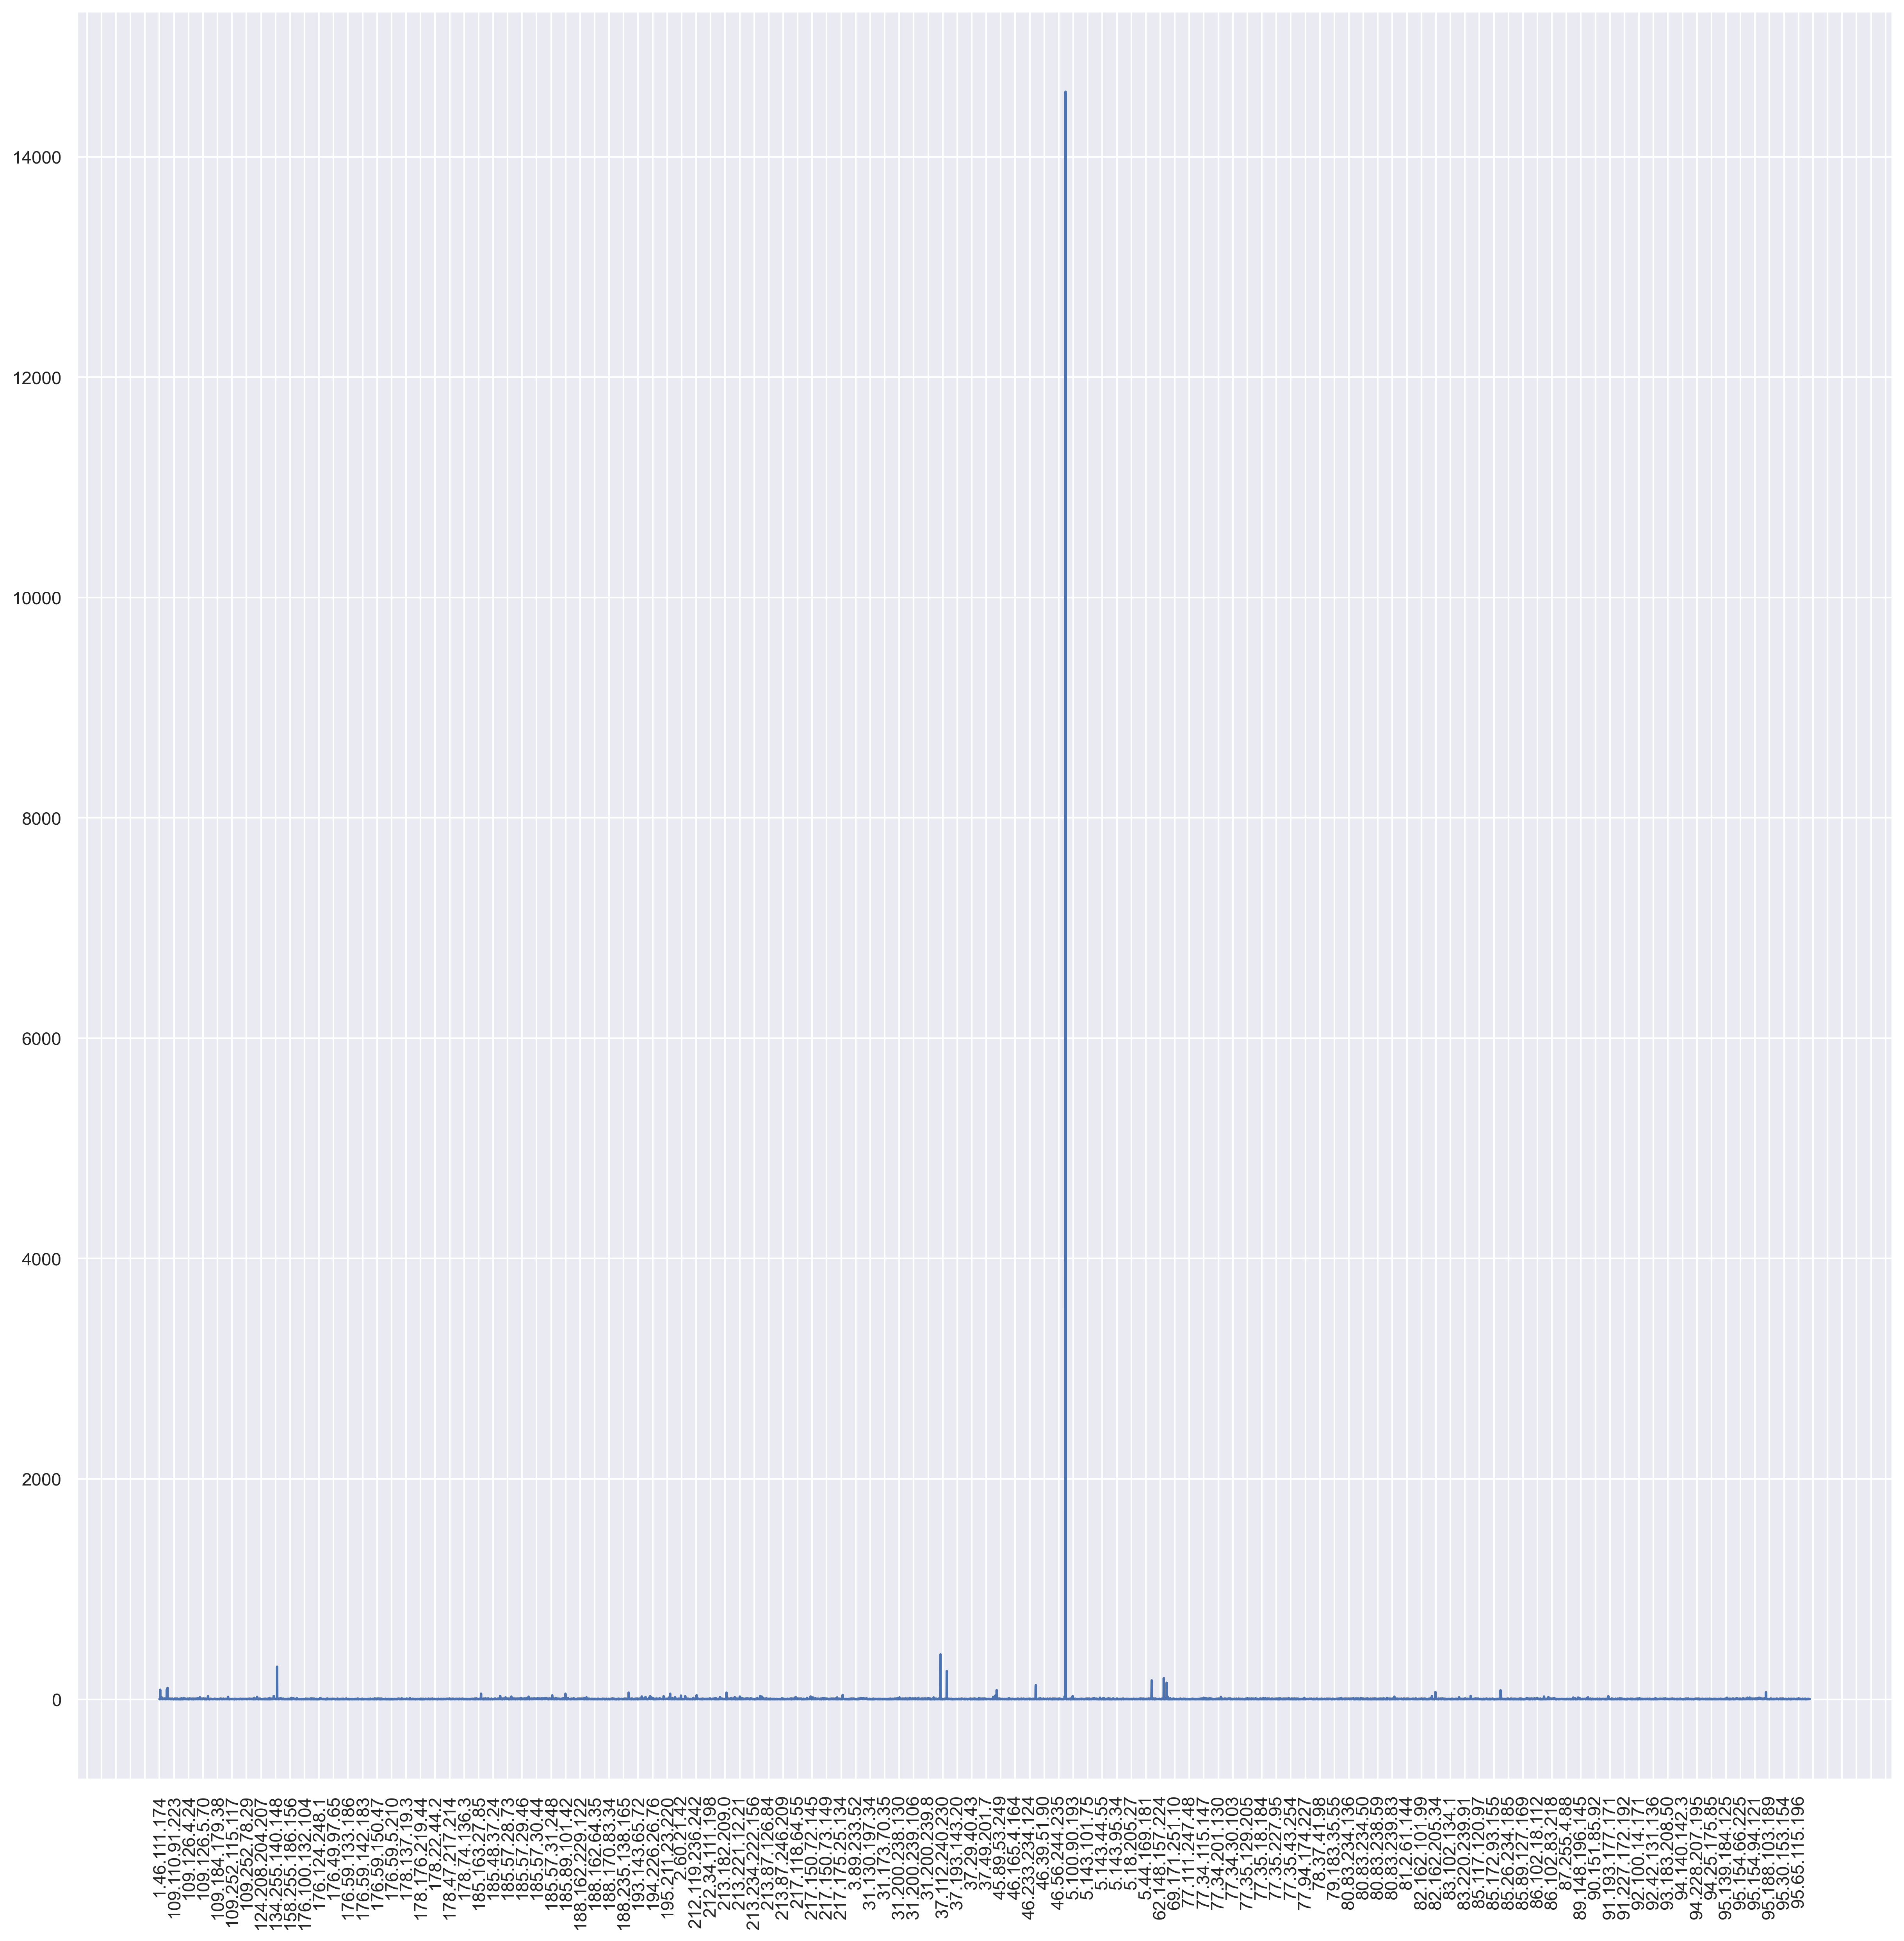

In [30]:
group_by_ip = df.loc[:,['IP']]
group_by_ip.head(20)
uniqip = group_by_ip.groupby(['IP'])['IP'].count()
uniqip.to_frame()
fig, ax = plt.subplots(1,1,sharey = True, sharex = False,figsize=(20,20),dpi=300)
ax.plot(uniqip)
tick_spacing = 100
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.xticks(rotation=90)
plt.show()

## Группировка времени от количества обращений

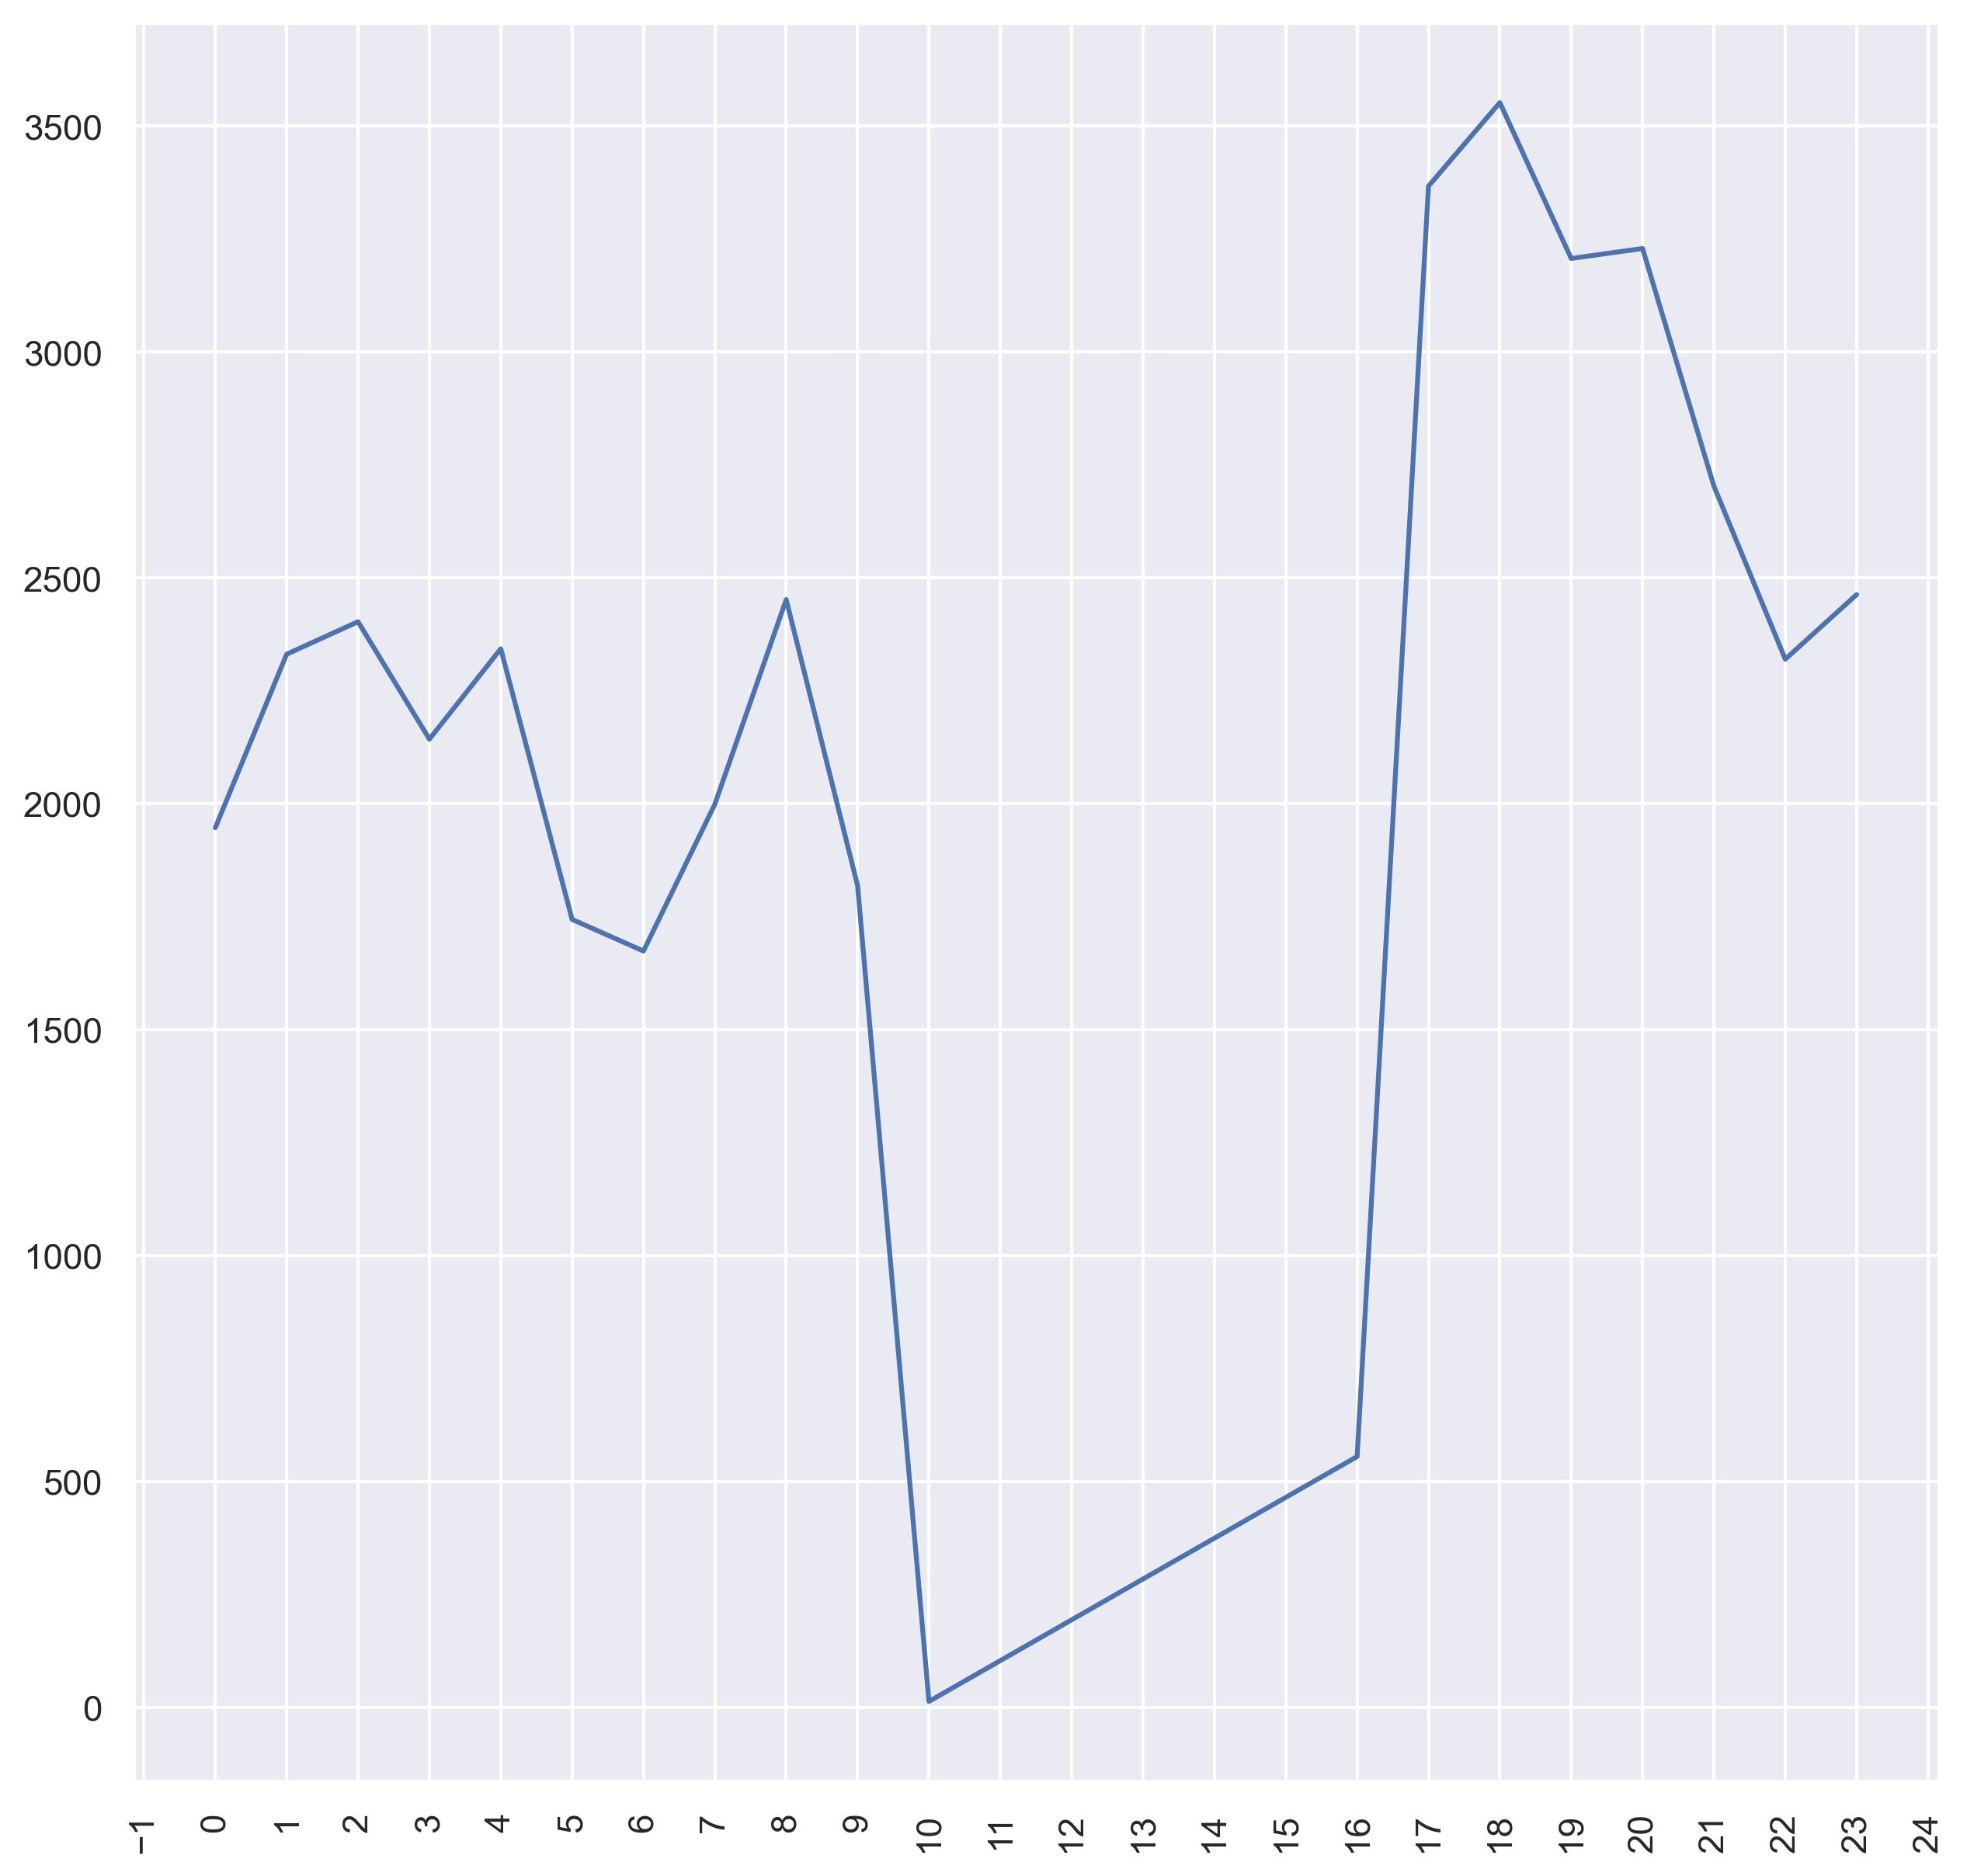

In [31]:
group_by_hour = df.loc[:,['TIME']]
group_by_hour['TIME']= group_by_hour['TIME'].str.split(':').apply(lambda x:int(x[0]))
uniqh = group_by_hour.groupby(['TIME'])['TIME'].count()
uniqh.to_frame()
fig, ax = plt.subplots(1,1,sharey = True, sharex = False,figsize=(10,10),dpi=300)
ax.plot(uniqh)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.xticks(rotation=90)
plt.show()

## Группировка стран по количеству обращений

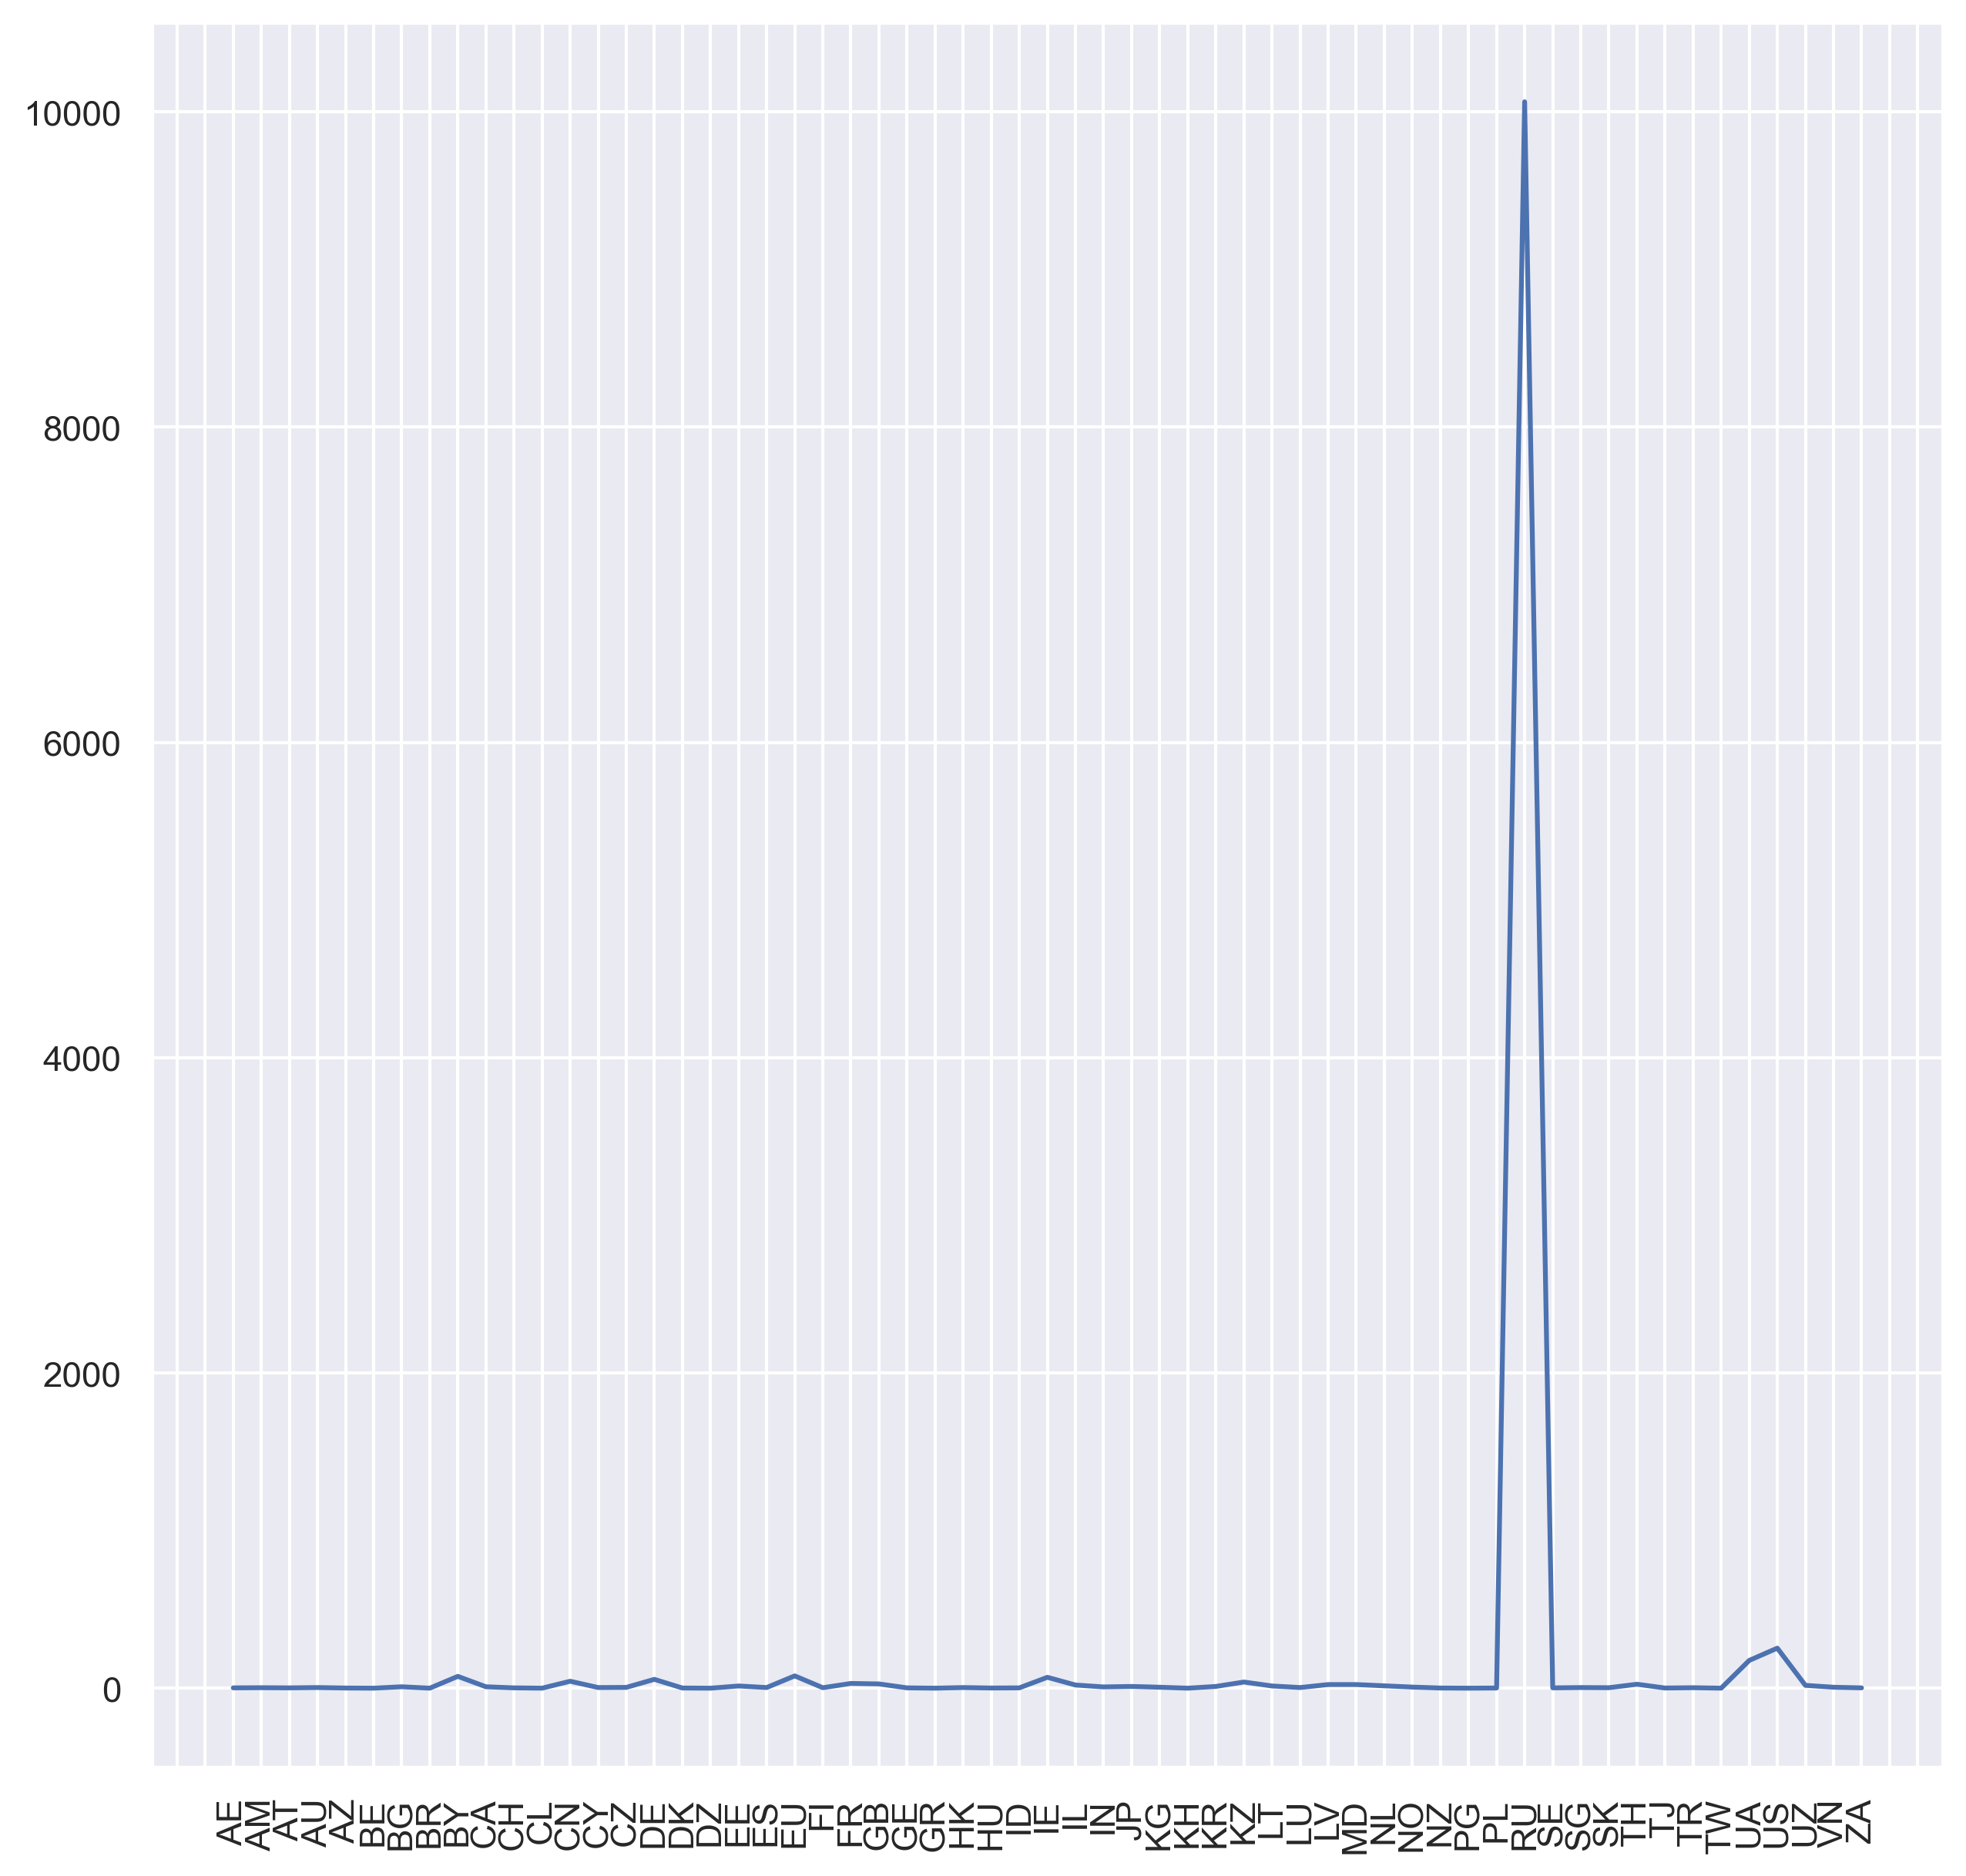

In [32]:
import pygeoip
group_by_area = df.loc[:,['IP']]
group_by_area.head(10)
gi = pygeoip.GeoIP('src/GeoLiteCity.dat')
uniqip = group_by_area.groupby('IP')['IP'].count()
uniqip=uniqip.to_frame()
uniqip['COUNTRY'] = [ gi.country_code_by_addr(i[0]) for i in uniqip.index.to_frame().values]
uniqarea = uniqip.groupby('COUNTRY')['IP'].count()

fig, ax = plt.subplots(1,1,sharey = True, sharex = False,figsize=(10,10),dpi=300)
ax.plot(uniqarea)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.show()

## Группировка регионов по обращению в России RU

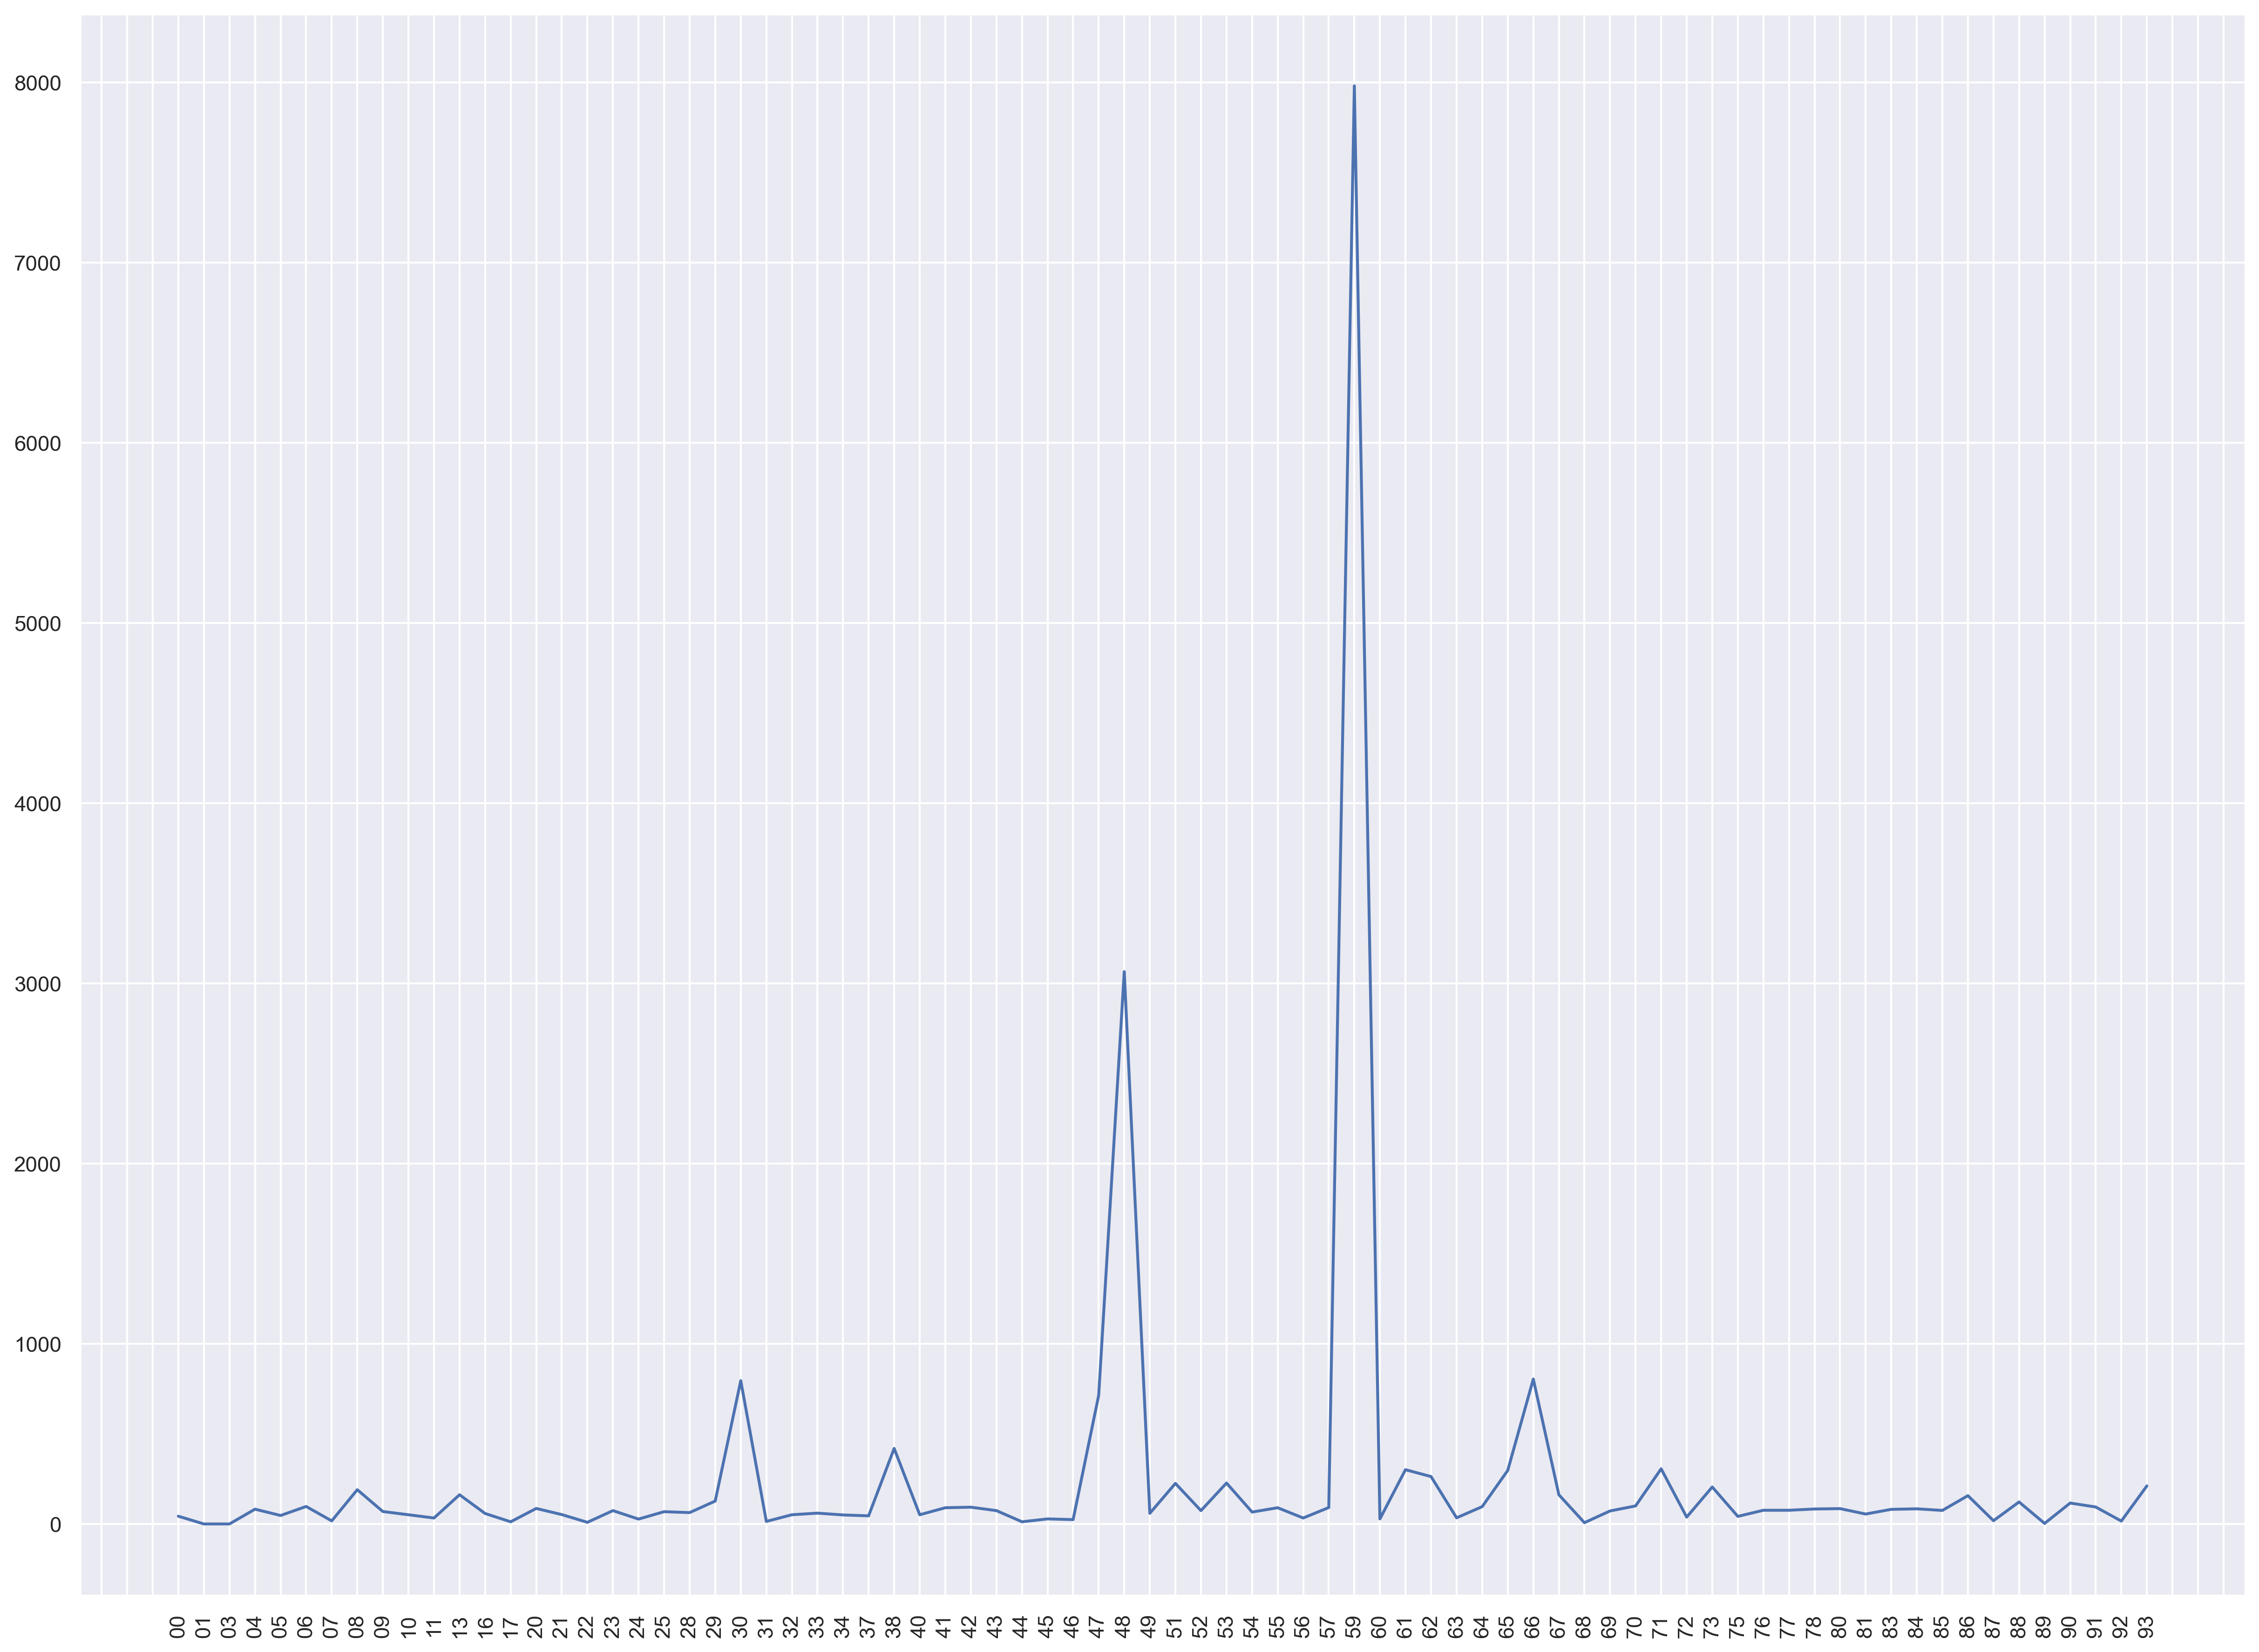

In [33]:
import pygeoip
group_by_area = df.loc[:,['IP','TIME']]
group_by_area.head(10)
gi = pygeoip.GeoIP('src/GeoLiteCity.dat')
group_by_area['COUNTRY'] = [gi.country_code_by_addr(i) for i in group_by_area['IP']]
filterRu = group_by_area['COUNTRY'] == 'RU'
group_by_area = group_by_area.loc[filterRu]
group_by_area['REGION'] = [gi.region_by_addr(i)['region_code'] for i in group_by_area['IP']]
res_group_by_area =group_by_area.groupby('REGION')['IP'].count()

fig, ax = plt.subplots(1,1,sharey = True, sharex = False,figsize=(20,15),dpi=300)
ax.plot(res_group_by_area)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.show()

### 59 region Permskaya oblast'

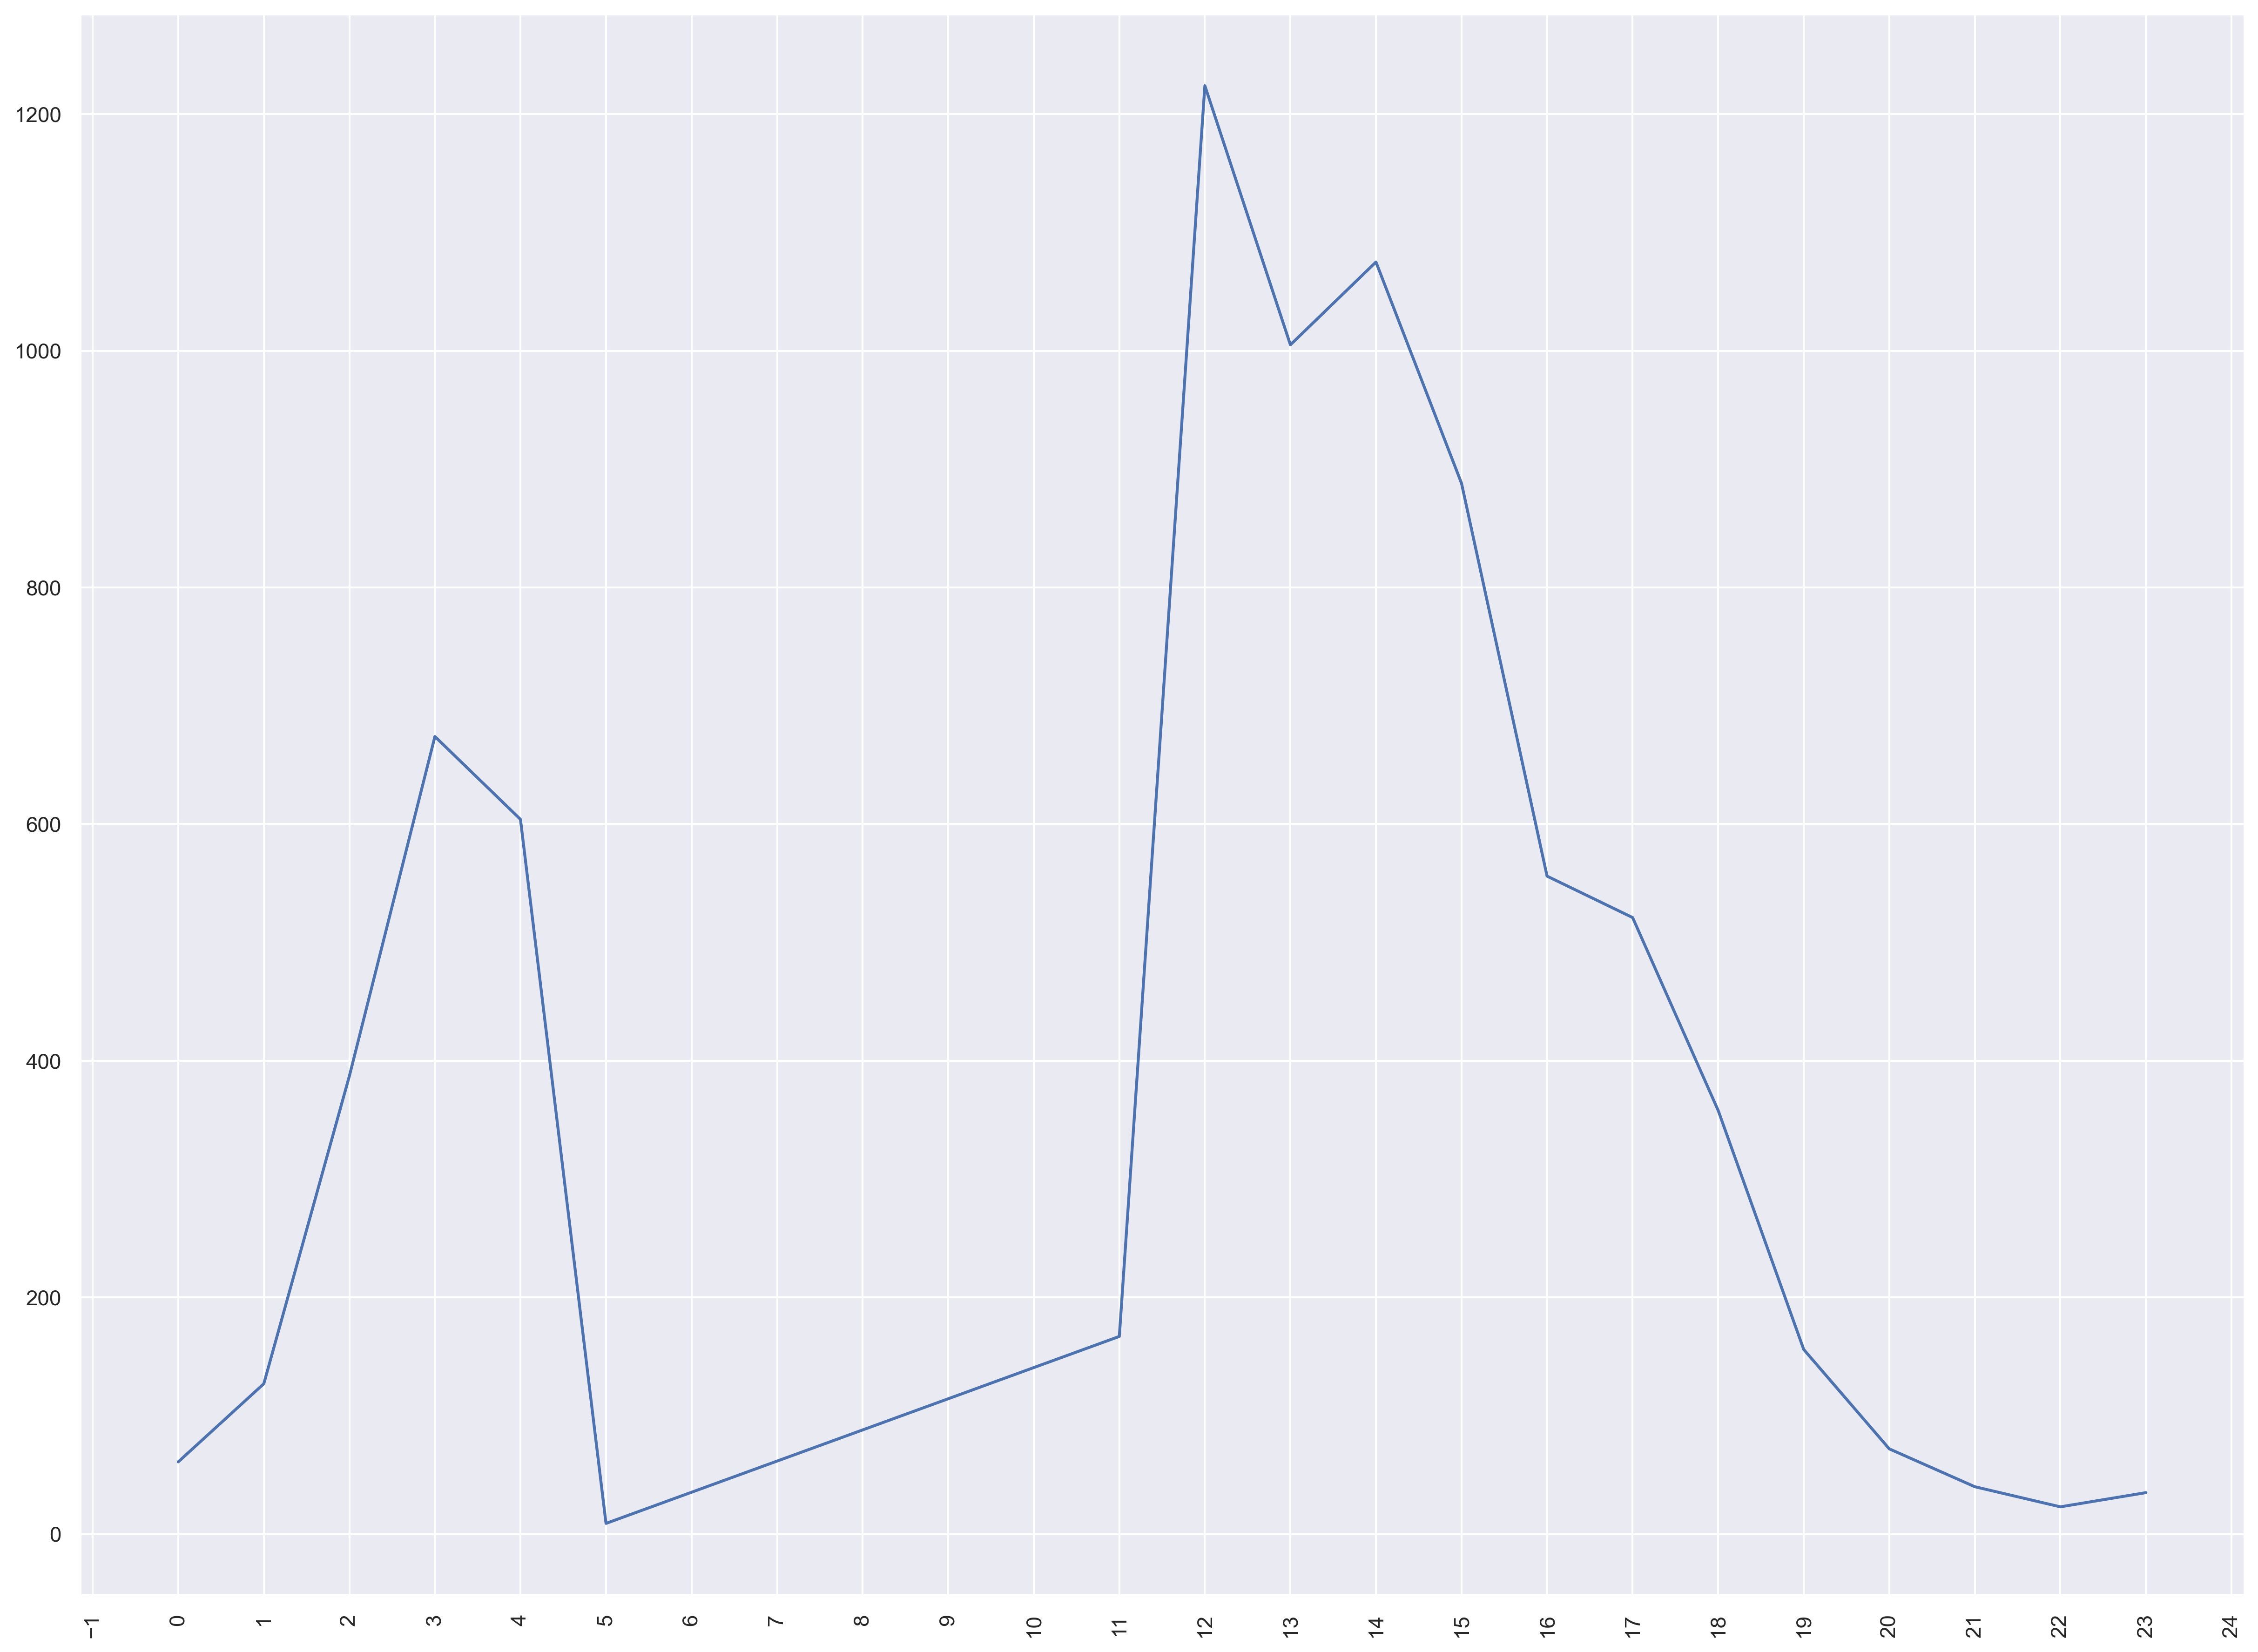

In [34]:
filter_59 = group_by_area['REGION']=='59'
region_59 = group_by_area.loc[filter_59]
namereg,gtm = regionnames['59']
diff = VLADTIMEGTM - gtm
region_59['TIME']= region_59['TIME'].str.split(':').apply(lambda x:(int(x[0])-diff + 24) % 24)
uniqh_59 = region_59.groupby(['TIME'])['TIME'].count()

fig, ax = plt.subplots(1,1,sharey = True, sharex = False,figsize=(20,15),dpi=300)
ax.plot(uniqh_59)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.show()

### 48 region Lipetskaya oblast'

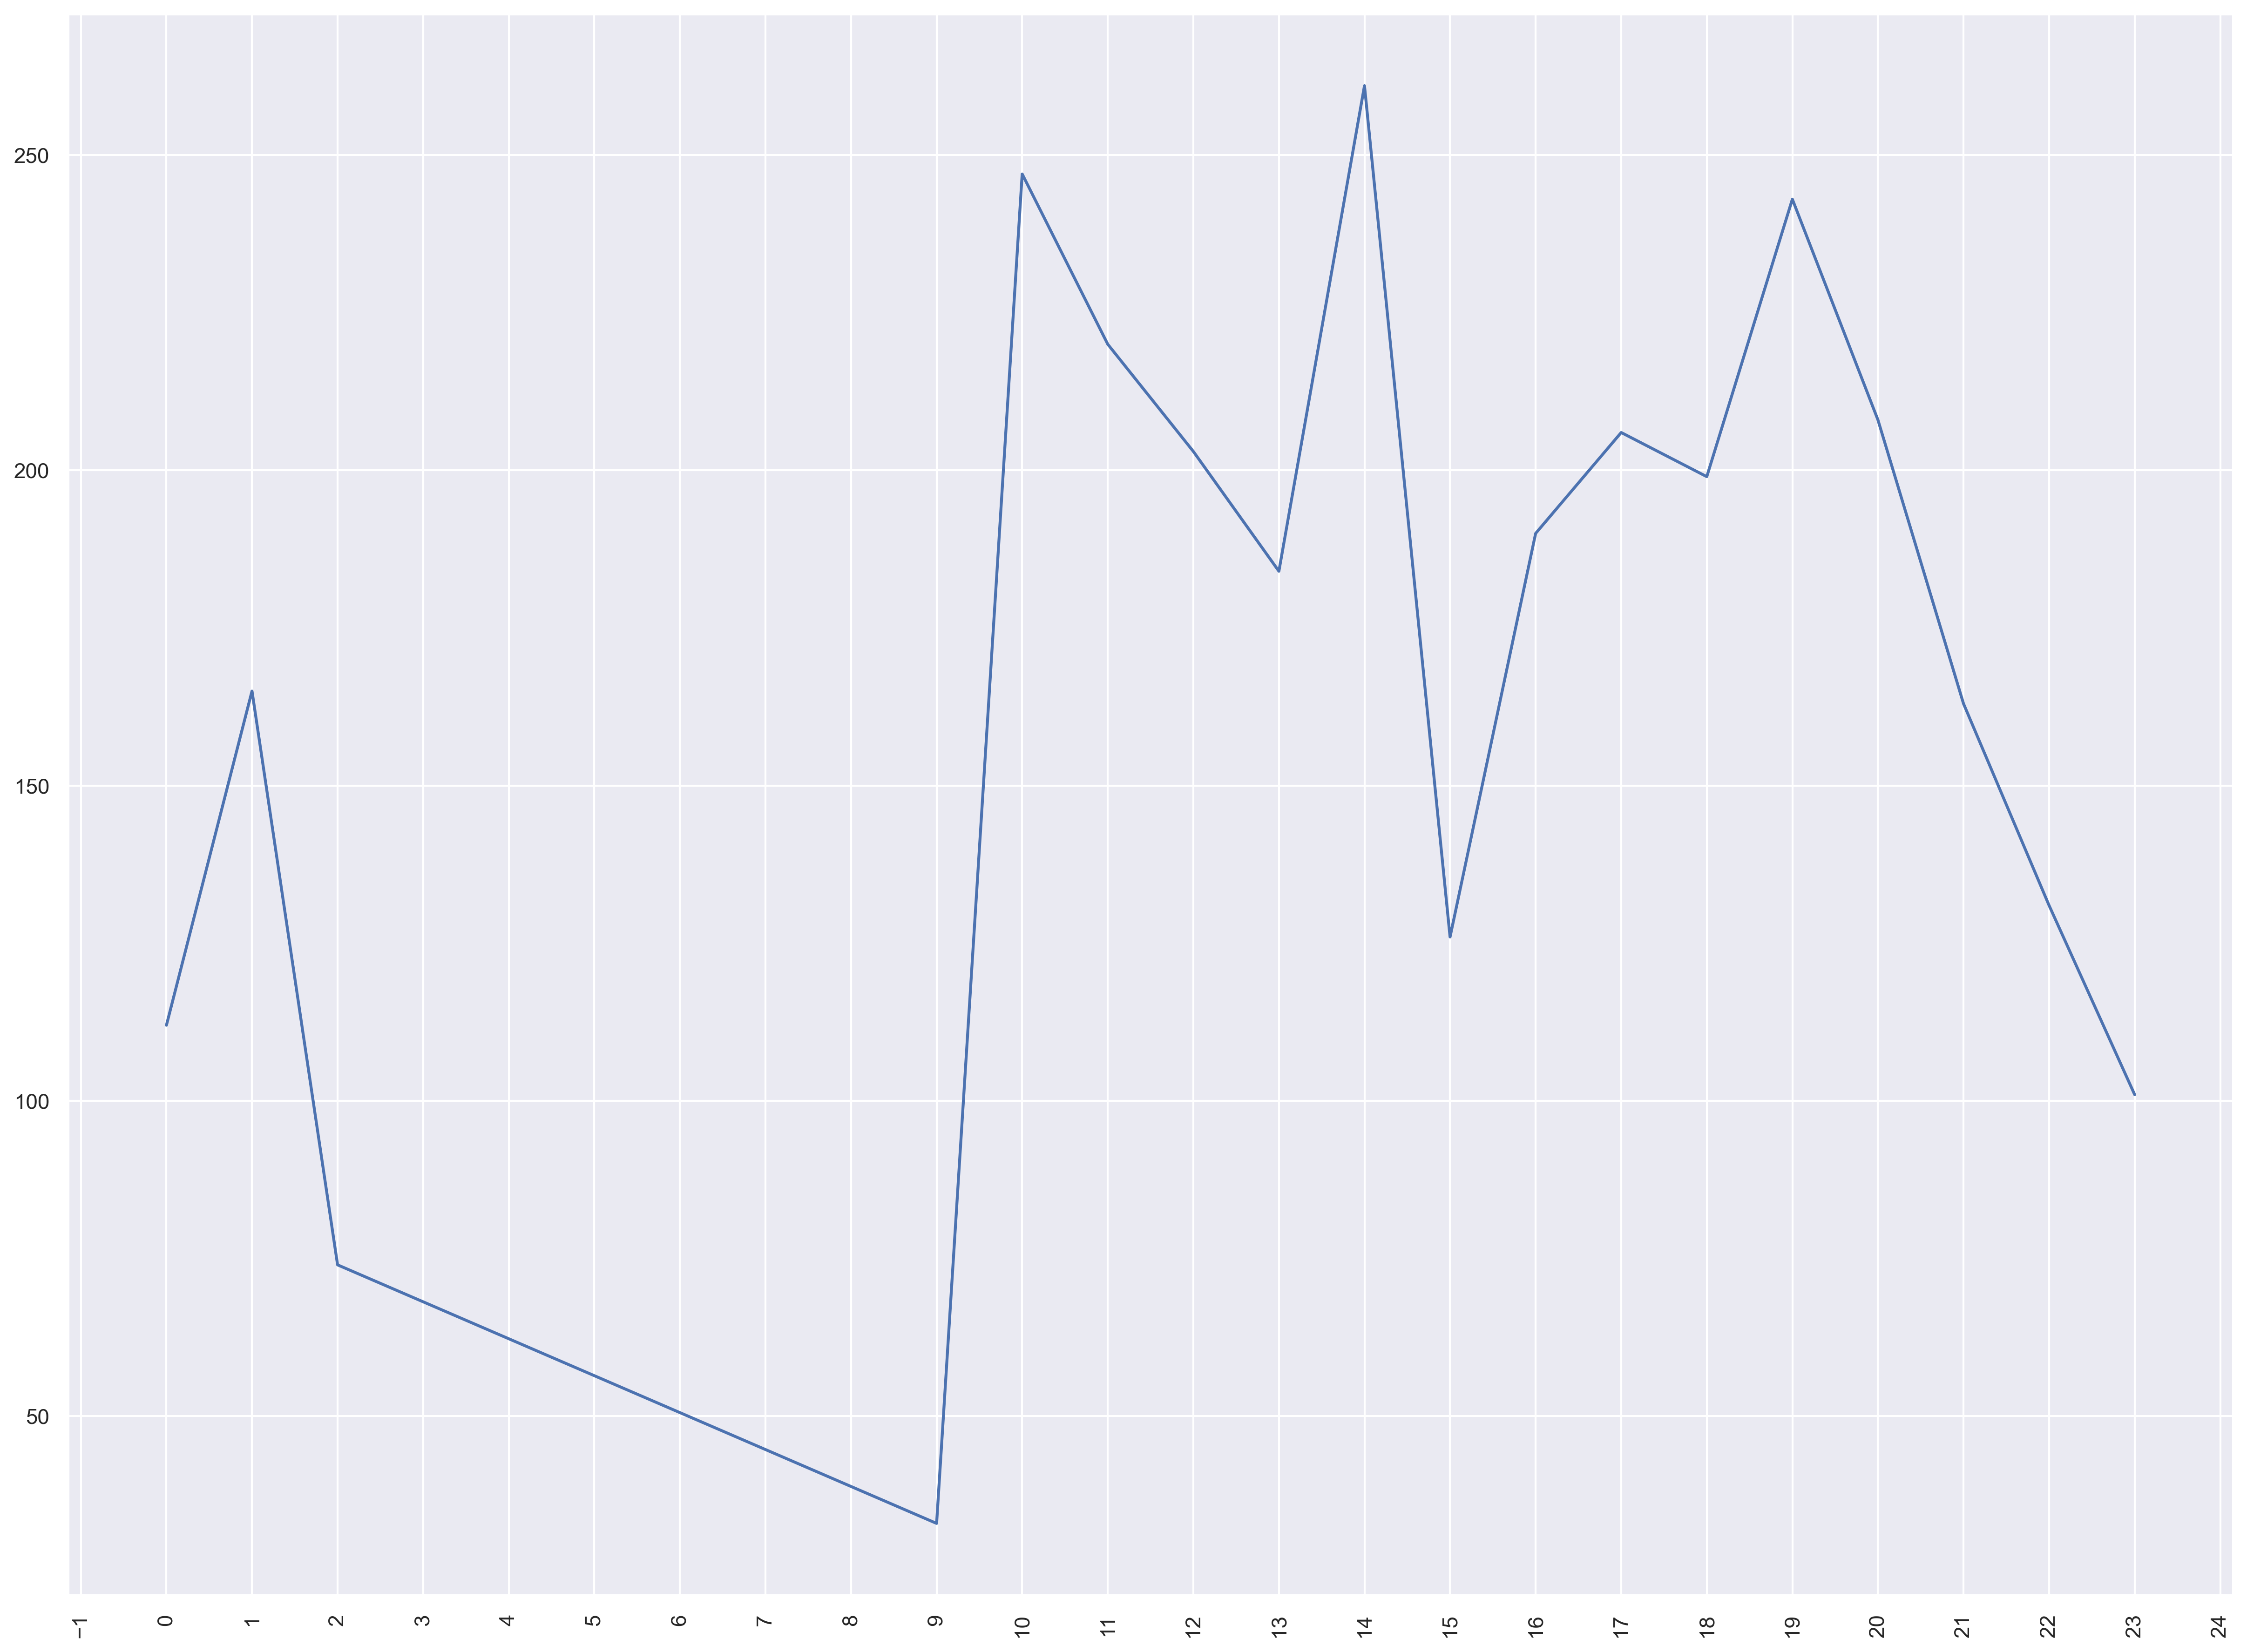

In [35]:
filter_48 = group_by_area['REGION']=='48'
region_48 = group_by_area.loc[filter_48]
namereg,gtm = regionnames['48']
diff = VLADTIMEGTM - gtm
region_48['TIME']= region_48['TIME'].str.split(':').apply(lambda x:(int(x[0])-diff + 24) % 24)
uniqh_48 = region_48.groupby(['TIME'])['TIME'].count()

fig, ax = plt.subplots(1,1,sharey = True, sharex = False,figsize=(20,15),dpi=300)
ax.plot(uniqh_48)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.show()

### 66 region Sverdlovskaya oblast'

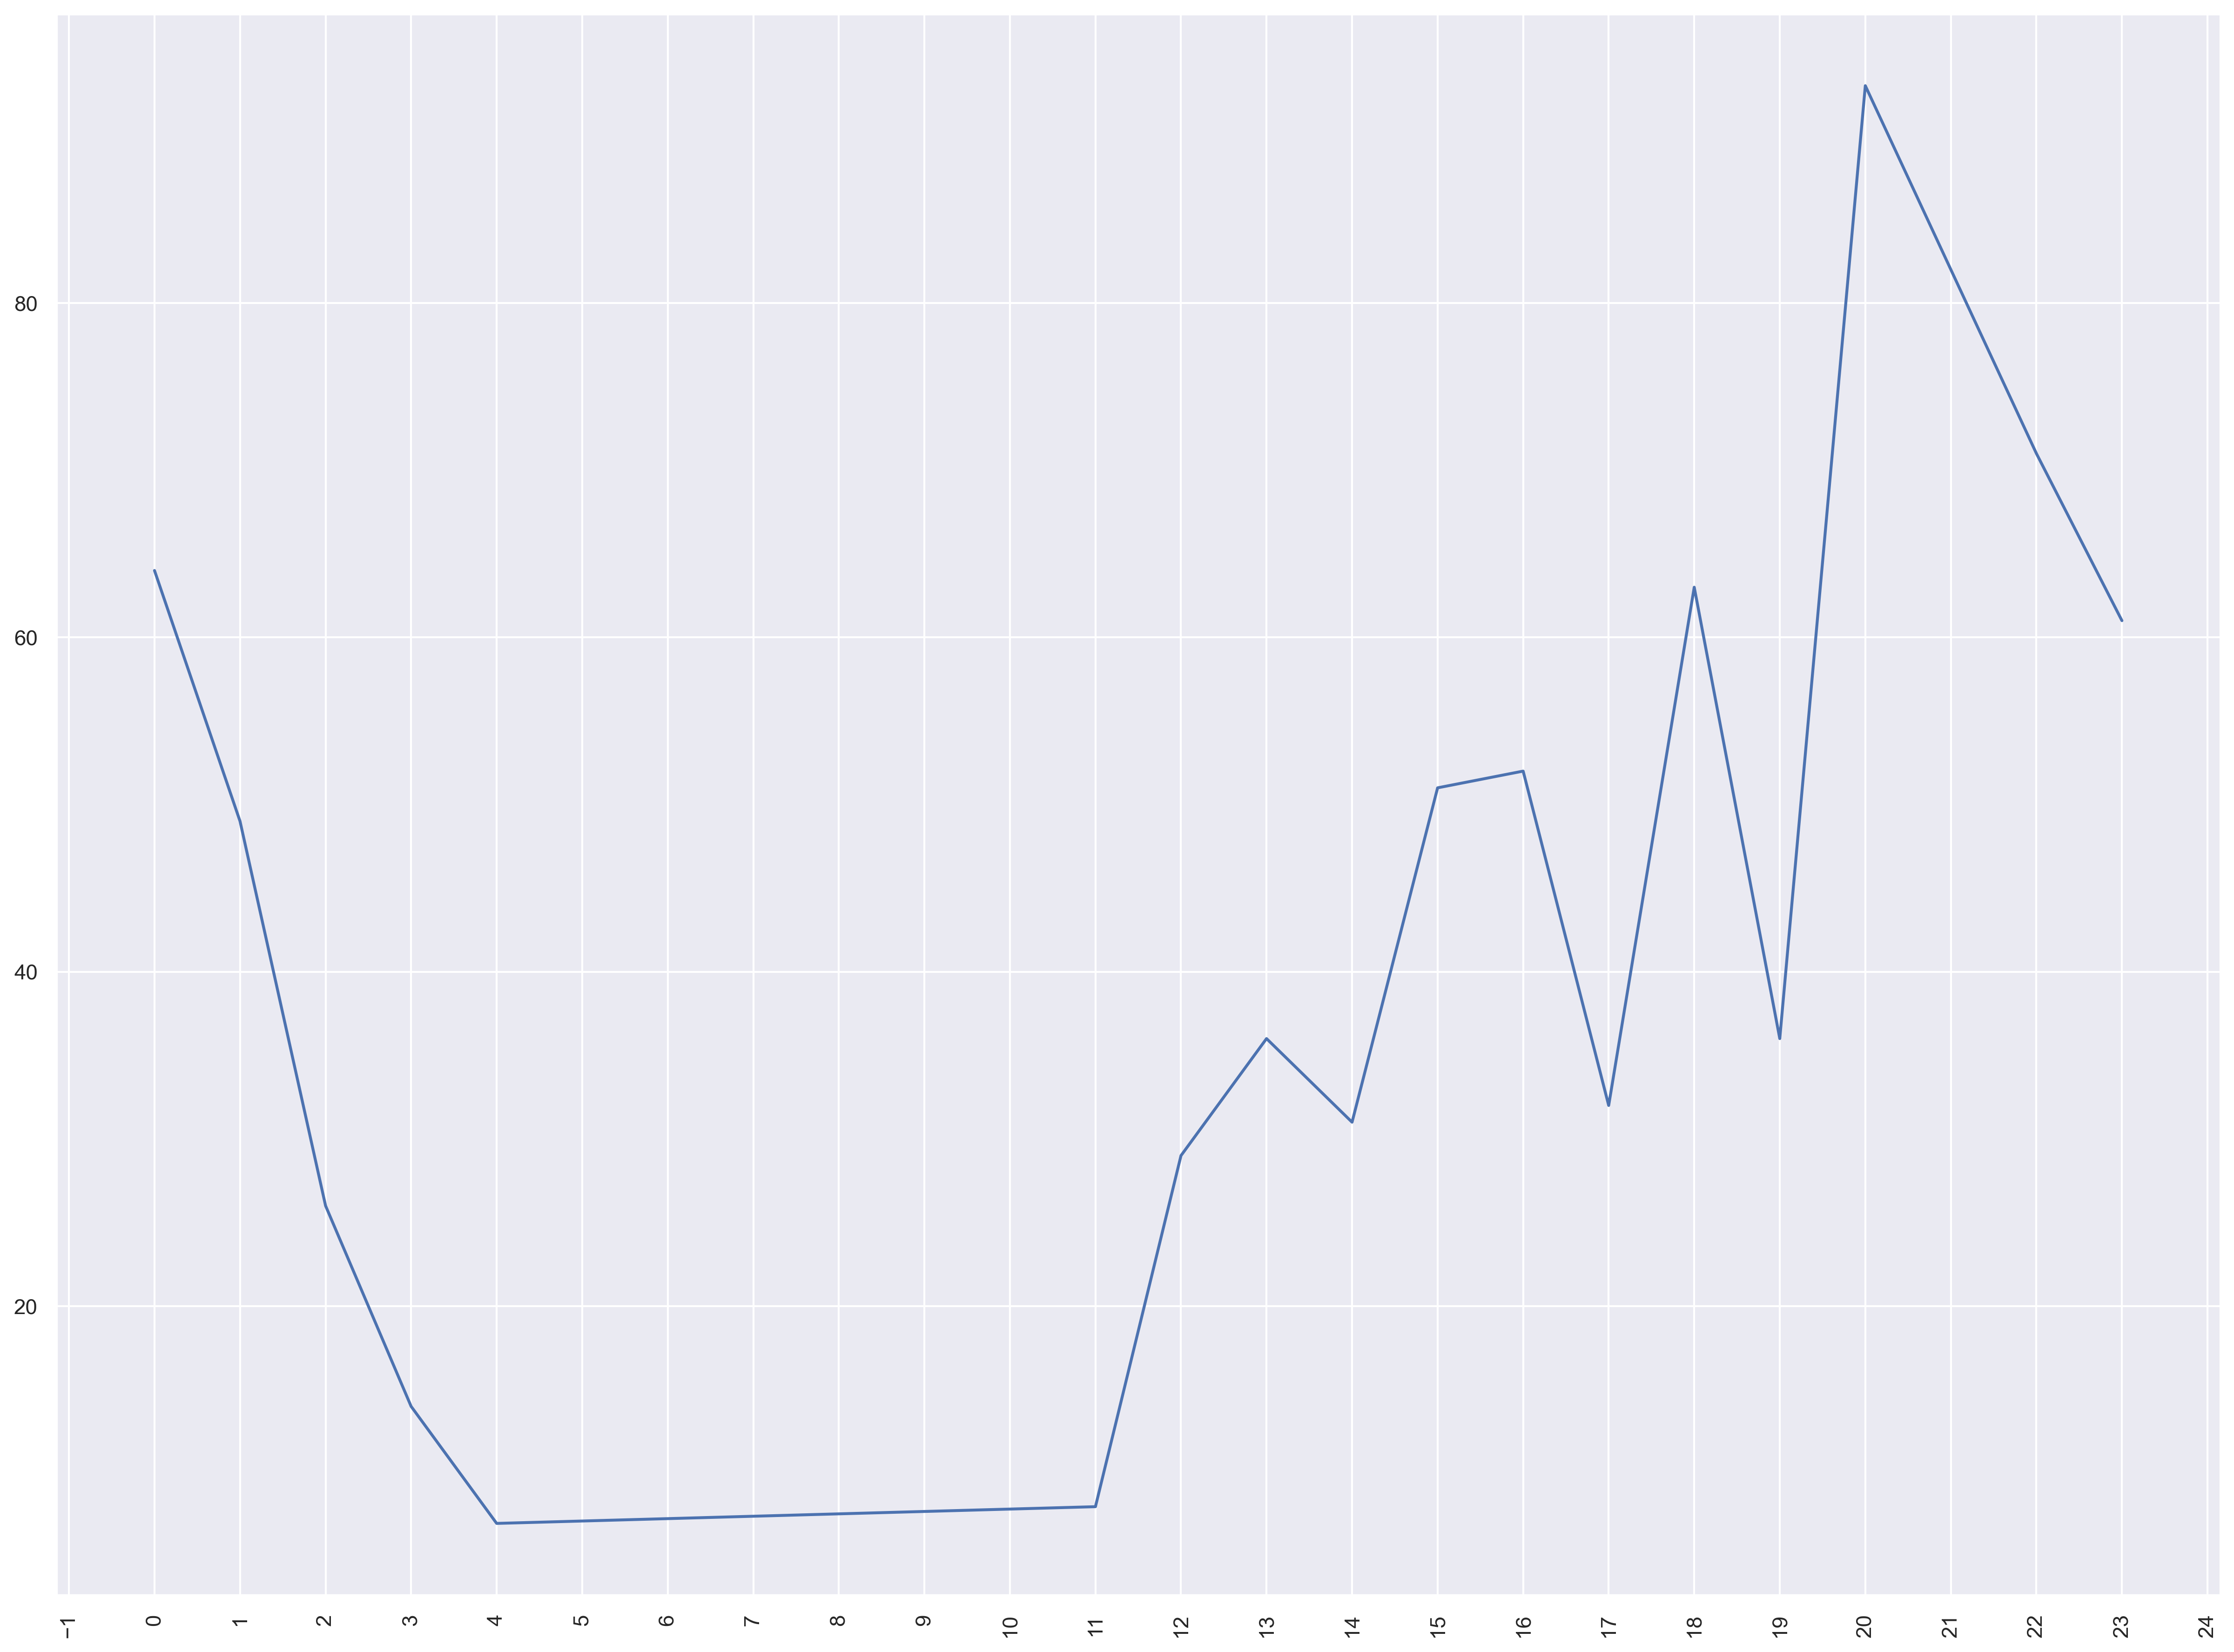

In [36]:
filter_66 = group_by_area['REGION']=='66'
region_66 = group_by_area.loc[filter_66]
namereg,gtm = regionnames['66']
diff = VLADTIMEGTM - gtm
region_66['TIME']= region_66['TIME'].str.split(':').apply(lambda x:(int(x[0])-diff + 24) % 24)
uniqh_66 = region_66.groupby(['TIME'])['TIME'].count()

fig, ax = plt.subplots(1,1,sharey = True, sharex = False,figsize=(20,15),dpi=300)
ax.plot(uniqh_66)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.show()

### 30 region Astrahanskaya oblast'

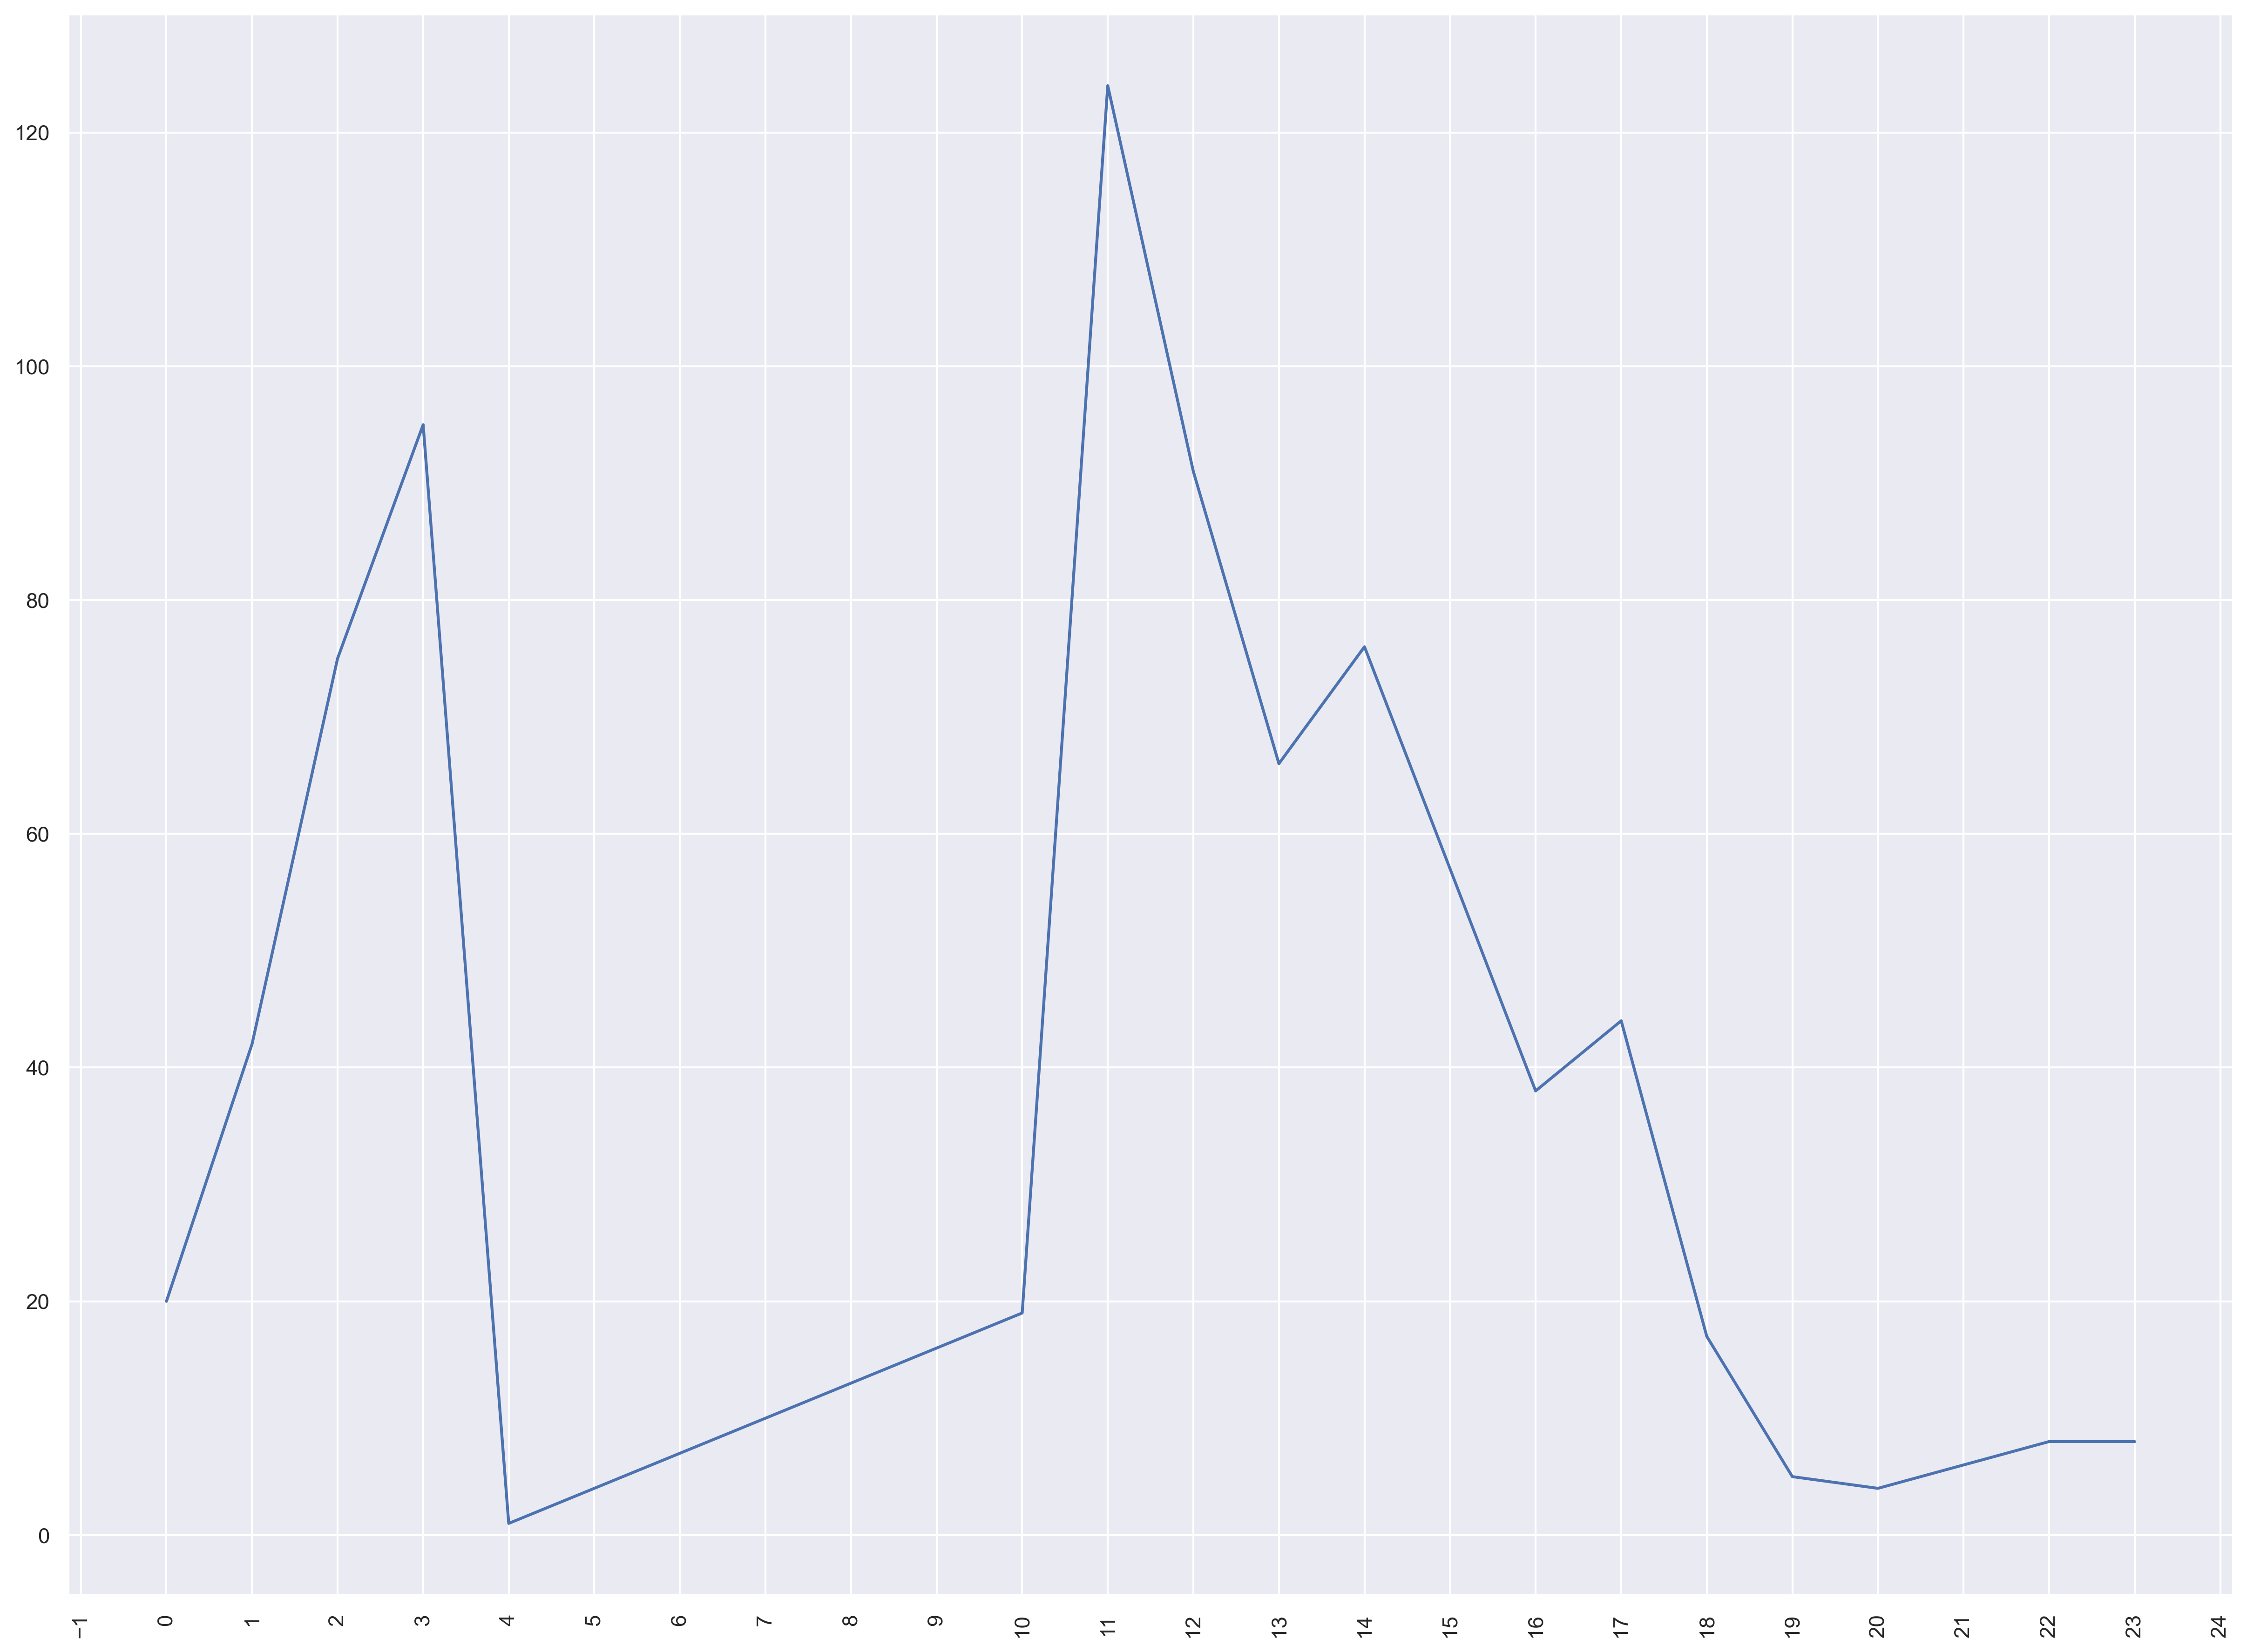

In [37]:
filter_30 = group_by_area['REGION']=='30'
region_30 = group_by_area.loc[filter_30]
namereg,gtm = regionnames['30']
diff = VLADTIMEGTM - gtm
region_30['TIME']= region_30['TIME'].str.split(':').apply(lambda x:(int(x[0])-diff + 24) % 24)
uniqh_30 = region_30.groupby(['TIME'])['TIME'].count()

fig, ax = plt.subplots(1,1,sharey = True, sharex = False,figsize=(20,15),dpi=300)
ax.plot(uniqh_30)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.show()


### 38 region Irkutskaya oblast'

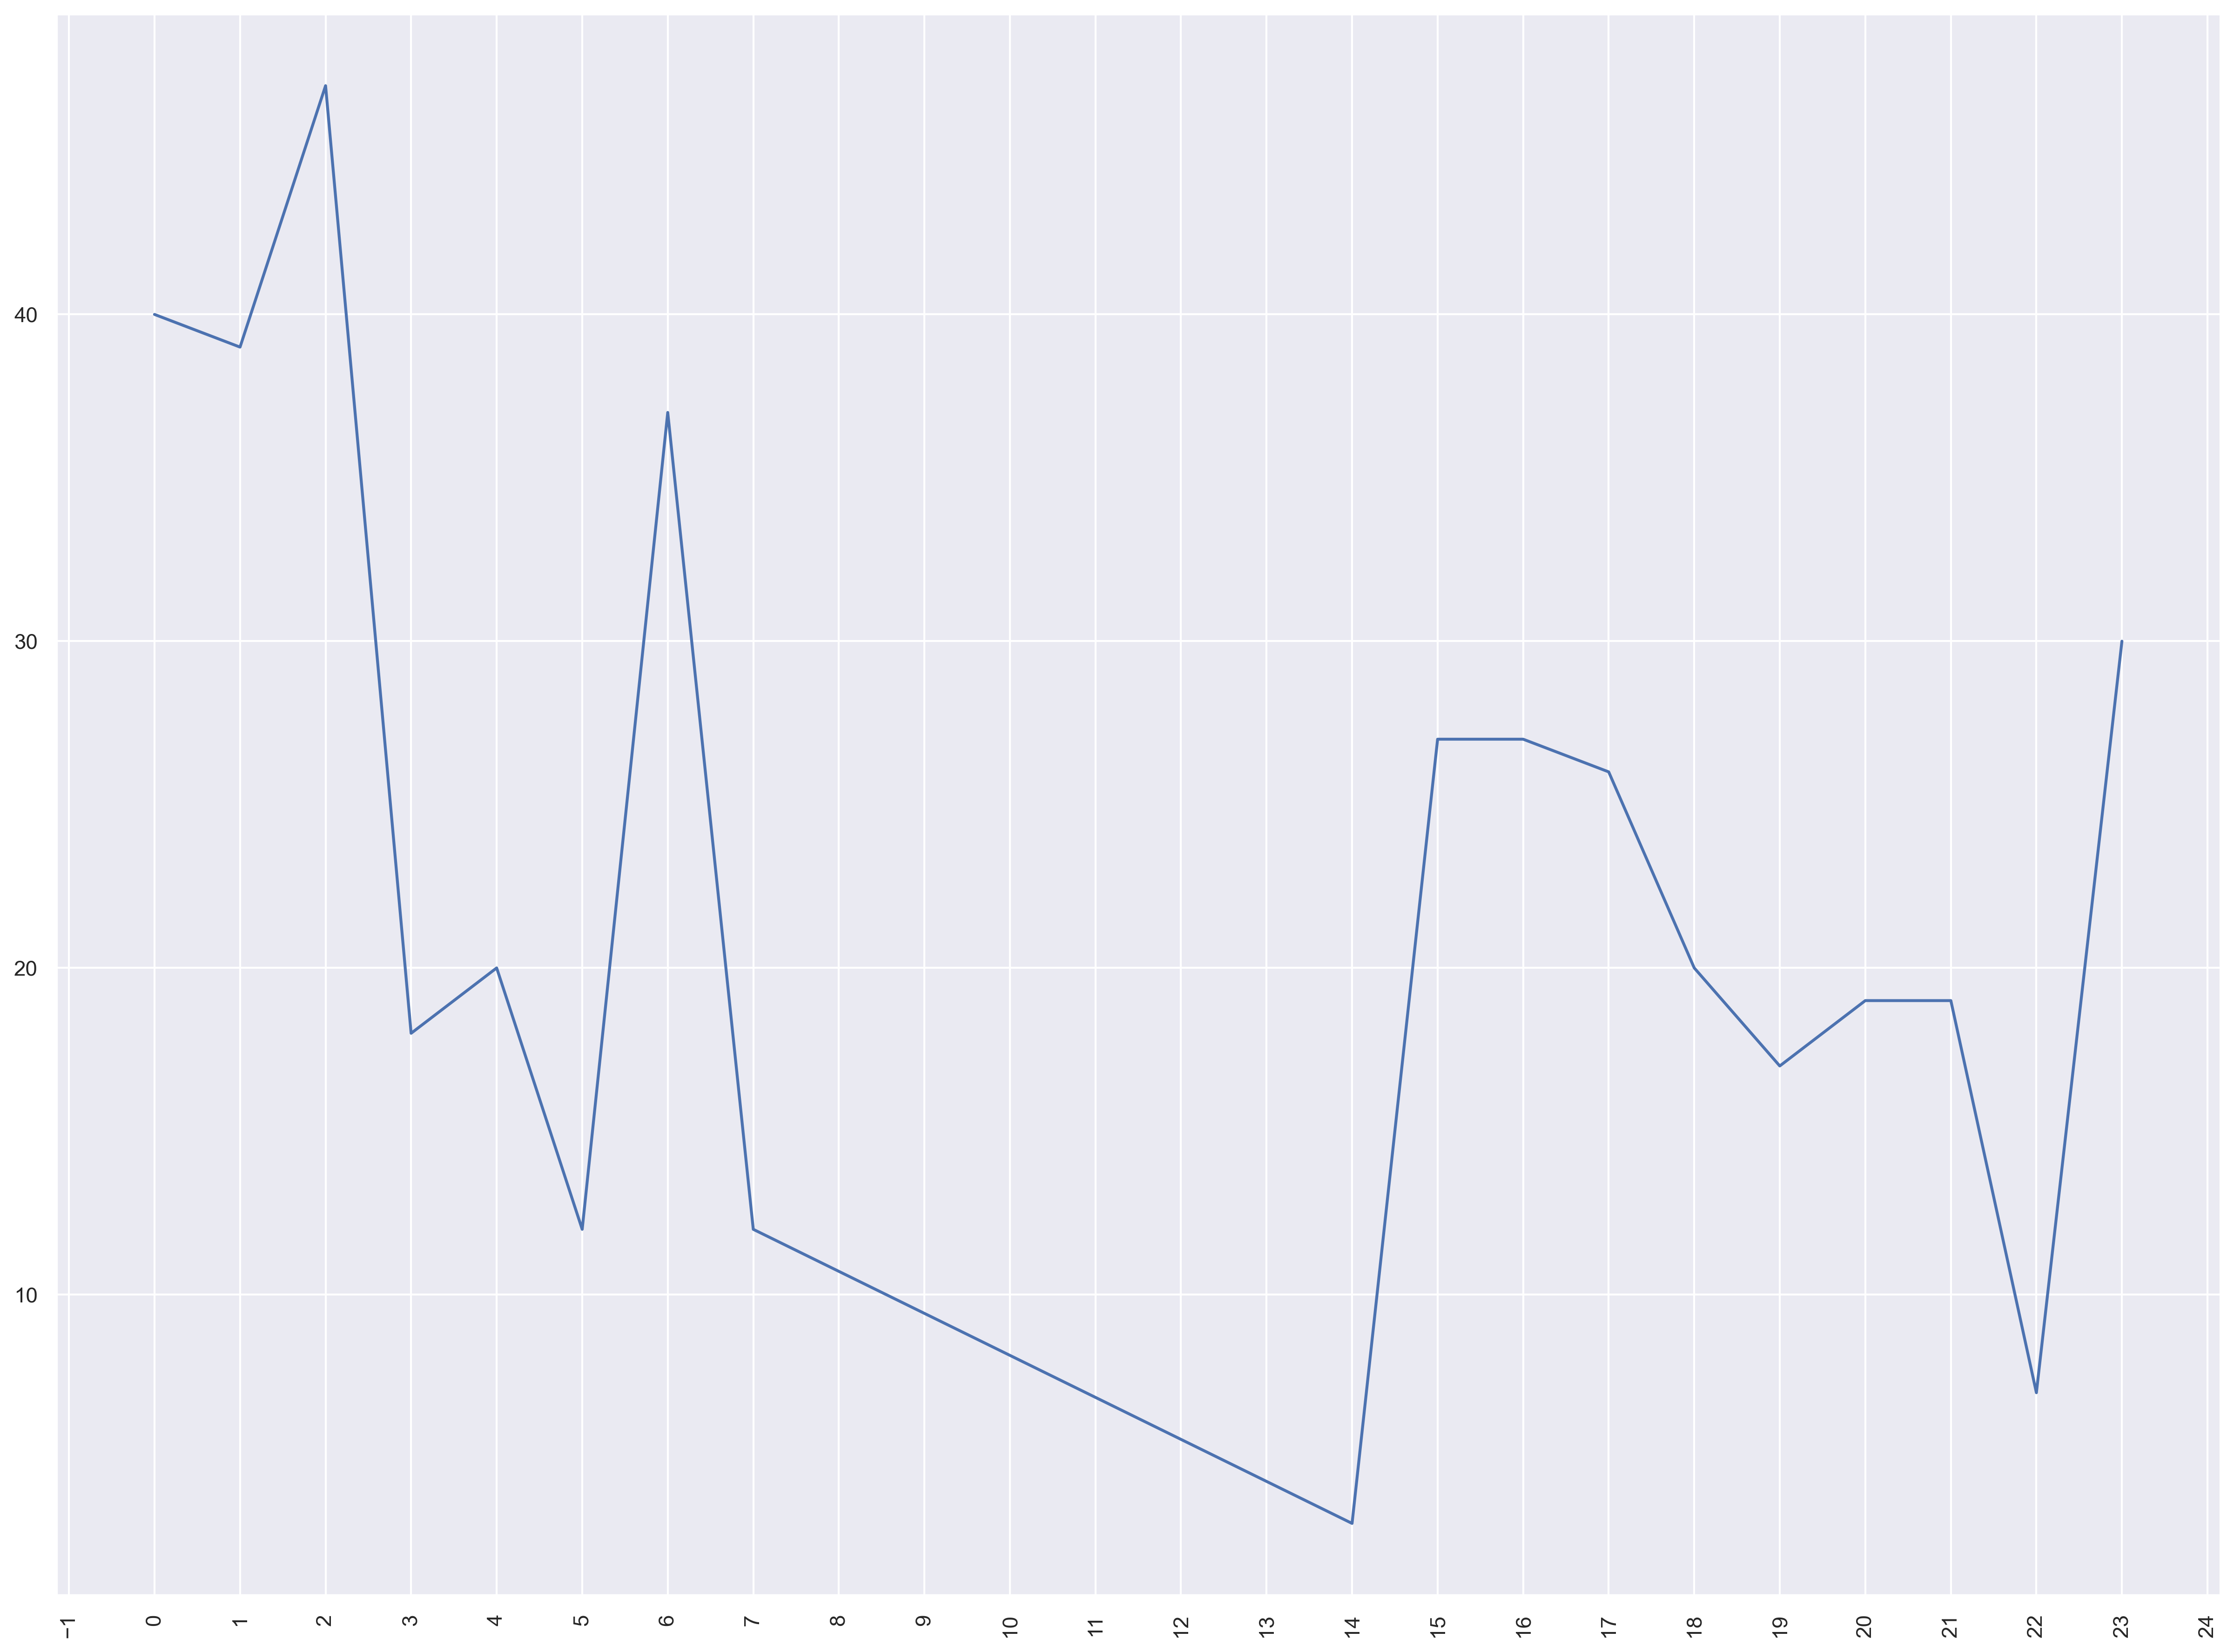

In [38]:
filter_38 = group_by_area['REGION']=='38'
region_38 = group_by_area.loc[filter_38]
namereg,gtm = regionnames['38']
diff = VLADTIMEGTM - gtm
region_38['TIME']= region_38['TIME'].str.split(':').apply(lambda x:(int(x[0])-diff + 24) % 24)
uniqh_38 = region_38.groupby(['TIME'])['TIME'].count()

fig, ax = plt.subplots(1,1,sharey = True, sharex = False,figsize=(20,15),dpi=300)
ax.plot(uniqh_38)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.show()